# Python Viz & Interactive Notebook Comparisons

M. Kolak | May 6, 2016 | <a href="https://github.com/Makosak/PySalViz"> PySAL Viz Project </a>

The goal of this exploration is to document visualization and interaction-enhanced options for PySAL. The primary interface used is the iPython notebooks, however consideration for how outputs would be incorporated in a light-weight web application setting are also outconsidered. 

For this investigation, I consider the following basic interaction tasks: zoom, move, hover, pop-up window, brush, and link.  Visualization quality, for static images, is also considered. 

<b> The following dependencies are tested: </b>
    <li> %Matplotlib inline </li>
    <li> %Matplotlib notebook</li>
    <li> MPLD3 </li>
    <li> Plotly </li>
    <li> Seaborn (with MPLD3) </li>

***
## Import Core Libraries

In [1]:
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
import matplotlib 
import matplotlib.pyplot as plt
import random as rdm
from pylab import *
from pysal.contrib.viz import mapping as maps

# Attempt to minimize deprecation warnings populating several 
# python visualization libraries; at least for display here.
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/IPython/.*')

***
## Prep Data Core

Our visualization analysis uses a standard dataset from the PySAL library: the North Carolina county SIDS death counts (N=100). A Moran's I rate will be calculated for SIDS deaths in 1979, per births in the same year. Data can also be downloaded <a href="http://geodacenter.org/downloads/data-files/sids.zip"> here</a>.

In [2]:
shp_link = ps.examples.get_path('sids2.shp')
data = ps.open(shp_link)

In [3]:
SIDS = ps.open(ps.examples.get_path("sids2.dbf"))
w = ps.open(ps.examples.get_path("sids2.gal")).read() # spatial weightsinstance
SID79 = np.array(SIDS.by_col('SID79')) # an event variable measured across n spatial units
BIR79 = np.array(SIDS.by_col('BIR79')) # a population-at-risk variable measured across n spatial units
SIDR79 = np.array(SIDS.by_col("SIDR79"))

In [4]:
mir = ps.esda.moran.Moran_Rate(SID79, BIR79, w, adjusted=True, transformation='r',
                               permutations=9999, two_tailed=False)

In [5]:
w_SID79= ps.lag_spatial(w, SID79)

var = SID79
w = w
slag = ps.lag_spatial(w, var)

zx   = (var - var.mean())/var.std()
zy  = (slag - slag.mean())/slag.std()

#custom
xlabel = "SIDS79"
ylabel = "SIDS79 Spatial Lag"
title = "Moran Plot for SIDS79"
custom = (5,5)

***
## Matplotlib %inline

In [6]:
%matplotlib inline

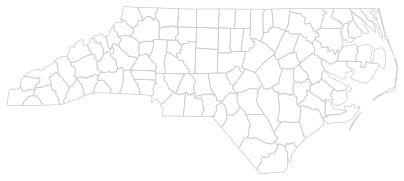

In [7]:
fig1a = figure(figsize=(7,3))

base = maps.map_poly_shp(data)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')

ax = maps.setup_ax([base], [data.bbox, data.bbox, data.bbox])
fig1a.add_axes(ax)

In [8]:
fit = ps.spreg.OLS(zx[:, None], zy[:,None])

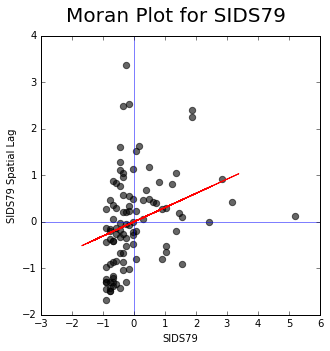

[ 0.30565254]


In [9]:
#custom 
fig1b = plt.figure(figsize=(5,5))
plt.xlabel(xlabel, fontsize=10)
plt.ylabel(ylabel, fontsize=10)
plt.suptitle(title, fontsize=20)
plt.scatter(zx, zy, c='k', s=40, alpha=.6)
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)

plot(zy, fit.predy, color='r')

plt.show()

print fit.betas[1]

### %Matplotlib inline Comments
Matplotlib object enabled within notebook
<p>
<li> Simplcity: 1-line addition to enable matplotlib images within notebook </li>
<li> Flat, static image. No interaction available. </li>
<li> Image output is a PNG file. Right-click enables capture of the PNG image. </li>
<li> Output can be converted to SVG with the addition of: <i> %config InlineBackend.figure_format = 'svg' </i>. </li>


***
## Matplotlib %notebook

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


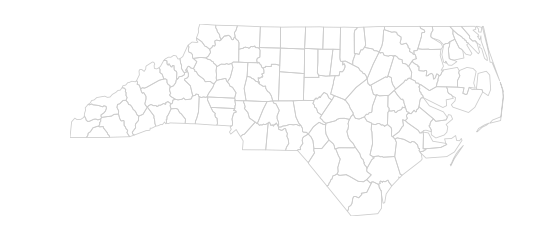

In [10]:
fig2a = figure(figsize=(7,3))

base = maps.map_poly_shp(data)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')

ax = maps.setup_ax([base], [data.bbox, data.bbox, data.bbox])
fig2a.add_axes(ax)

<IPython.core.display.Javascript object>


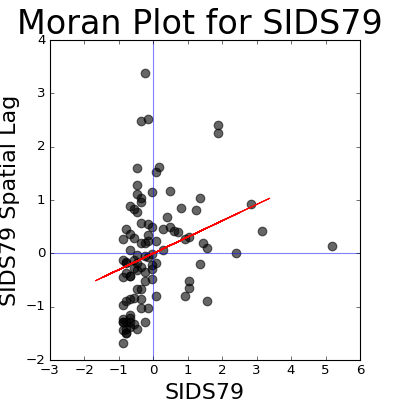

In [11]:
fit = ps.spreg.OLS(zx[:, None], zy[:,None])

fig2b = plt.figure(figsize=(5,5))
plt.xlabel(xlabel, fontsize=20)
plt.ylabel(ylabel, fontsize=20)
plt.suptitle(title, fontsize=30)
plt.scatter(zx, zy, s=60, color='k', alpha=.6)
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)

plot(zy, fit.predy, color='r')

plt.show()

### %Matplotlib notebook Comments
Matplotlib object enabled with interaction within notebook
<p>
<li> Simplicity: 1-line addition to enable existing matplotlib images </li>
<li> Hover, pop-up and advanced interaction not default, nor straightforward </li>
<li> Polygons are flattened/rasterized before rendering; requires additional event-handling hacking </li>
<li> If %matplotlib inline later run, all interactive graphics from %notebook are flattened </li>

***
## MPLD3

In [10]:
import mpld3
from mpld3 import plugins, utils

In [11]:
fig3a = figure(figsize=(7,3))

base = maps.map_poly_shp(data)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')

ax = maps.setup_ax([base], [data.bbox, data.bbox, data.bbox])
fig3a.add_axes(ax)

mpld3.display()

/Users/Masia/anaconda/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:82: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


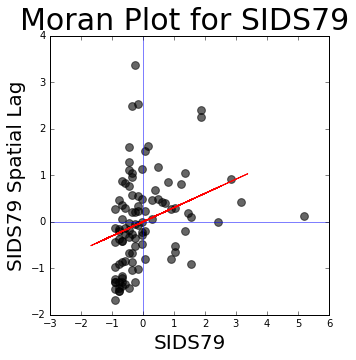

In [12]:
fig3b = plt.figure(figsize=(5,5))
plt.xlabel(xlabel, fontsize=20)
plt.ylabel(ylabel, fontsize=20)
plt.suptitle(title, fontsize=30)
points = plt.scatter(zx, zy, s=60, color='k', alpha=.6)
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)

plot(zy, fit.predy, color='r')

# dither the data for clearer plotting
zx += 0.1 * np.random.random(zx.shape)

# Brushing
plugins.connect(fig3b, plugins.LinkedBrush(points))

# Mouseover 
plugins.connect(fig3b, plugins.MousePosition(fontsize=14))

mpld3.enable_notebook()



### MPLD3 Comments
Converts matplotlib object to javascript, and employs D3 library

<p>
<li> More complicated </li>
<li> Original code not updated regularly anymore by author </li>
<li> Once object has converted to javascript correctly, limitless options & flexibility </li>
<li> Necessitates additional dependency; long-term viability? </li>
<li> Event-handling issues remain to separate vector from raster mpl; isse from matplotlib though </li>
<li> Axes not plotting where assigned; bug! </li>
<li> Inconsistent results; what renders in iPy notebook was not the same as what was exported as HTML in one test </li>

***
## Plotly

In [13]:
%matplotlib inline
import plotly.plotly as py

from plotly.graph_objs import *
py.sign_in('makosa', 'bwzfmvpc4c')

PlotlyError: The `figure_or_data` positional argument must be either `dict`-like or `list`-like.

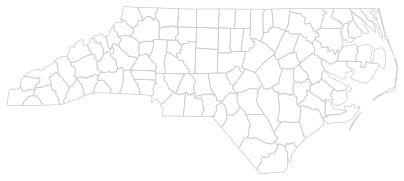

In [14]:
fig4a = figure(figsize=(7,3))

base = maps.map_poly_shp(data)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')

ax = maps.setup_ax([base], [data.bbox, data.bbox, data.bbox])
fig4a.add_axes(ax)

py.iplot(fig4a, validate=False)

In [15]:
fig4b = plt.figure(figsize=(5,5))
plt.xlabel(xlabel, fontsize=20)
plt.ylabel(ylabel, fontsize=20)
plt.suptitle(title, fontsize=30)
plt.axvline(0)
plt.axhline(0)
points = plt.scatter(zx, zy, s=60, color='k', alpha=.6)
plot(zy, fit.predy, color='r')

py.iplot_mpl(fig4b)

/Users/Masia/anaconda/lib/python2.7/site-packages/plotly/matplotlylib/mplexporter/exporter.py:82: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.

/Users/Masia/anaconda/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!



### Plotly Comments
Converts matplotlib object to Plotly interactive graphics
<p>
<li> Requires username and API key </li>
<li> Gorgeous plots with automated interaction </li>
<li> Will not render our existing matplotlib figures of polygons; requires different mapping setup </li>
<li> Uses MPLD3 as source code, but less buggy; Plotly has a staff that builds/works on this </li>
<li> Can customize plot in clean GUI interface on Plotly website </li>
<li> While mpl -> ply is free and open source, not all Plotly is; may cost $$ for some features? </li>
<li> May be limits to customization otherwise </li>

***
## Seaborn with MPLD3

In [16]:
import seaborn as sns

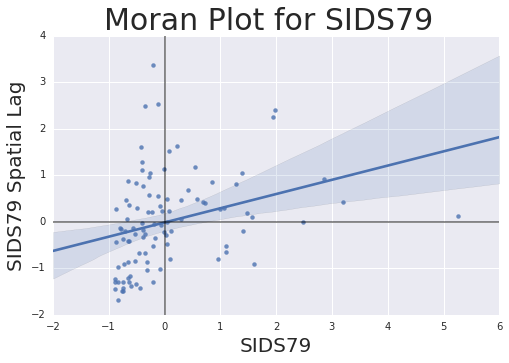

In [17]:
fig5b = plt.figure(figsize=(8,5))

points = sns.regplot(x=zx, y=zy, data=SIDS)

plt.xlabel(xlabel, fontsize=20)
plt.ylabel(ylabel, fontsize=20)
plt.suptitle(title, fontsize=30)

# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)

# Display
#plt.show()

# Brushing
plugins.connect(fig5b, plugins.LinkedBrush(points))

# Mouseover 
plugins.connect(fig5b, plugins.MousePosition(fontsize=14))

# Save output as an html file in same directory
mpld3.save_html(fig5b,"./mpld3Seaborn1.html")

### Seaborn + MPLD3 Comments 
Seaborn is a Python visualization library based on matplotlib. Suggested connections with MPLD3 for interaction.
<p>
<li> While results visually appealing, interaction not properly enabled as MPLD3. </li>
<li> Axes jumps between object in notebook and when output as an html page </li>
<li> Basic interaction (zoom; pan; etc) still available with %matplotlib notebook </li>
<li> Buggy nature of MPLD3 may be be shortcoming for this connection for now. </li>
<li> Needs further investigation! </li>